In [1]:
# packages

import numpy as np
import cobra
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

In [3]:
%matplotlib inline
import plot_helper

ModuleNotFoundError: No module named 'plot_helper'

In [4]:
model = read_sbml_model("iJN678.xml")
model

Name,iJN678
Memory address,0x02e1a8ca2cd0
Number of metabolites,795
Number of reactions,863
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_SynHetero - 1.0*BIOMASS_Ec_SynHetero_reverse_5d8af
Compartments,"cytosol, periplasm, thylakoid, extracellular space"


In [5]:
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

In [6]:
nominal = model.optimize()
loopless = loopless_solution(model)

In [7]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))loopless_solution

<AxesSubplot:xlabel='loopless', ylabel='nominal'>

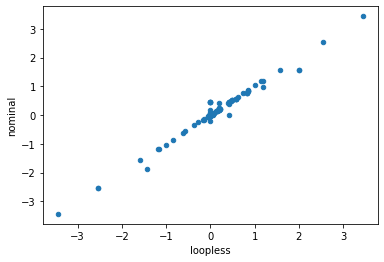

In [8]:
df.plot.scatter(x='loopless', y='nominal')

In [12]:
solution = pfba(model)
solution

,fluxes,reduced_costs
EX_ac_e,0.000000,90.0
34DHOXPEGOX,0.000000,2.0
EX_photon_e,0.000000,24.0
34HPPOR,0.000033,-2.0
EX_ca2_e,-0.000285,2.0
...,...,...
CBFCpp,2.015565,-2.0
CYO1b2_syn,0.000000,-0.8
PHETA1,-0.011666,2.0
ORNTAC,0.017175,-2.0


In [13]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction BIOMASS_Ec_SynHetero at 0x2e1aef309d0>: 1.0}

In [14]:
# change the objective to squalene production

model.objective = "SQLS"   # squalene synthase
model.reactions.get_by_id("SQLS").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction SQLS at 0x2e1aefe6b20>: 1.0}

In [ ]:
nominal = model.optimize().objective_value
loopless = loopless_solution(model)

df.plot.scatter(x='loopless', y='nominal_sq')

In [ ]:
solution = pfba(model)
solution